In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv


In [3]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()



In [4]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [5]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [6]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


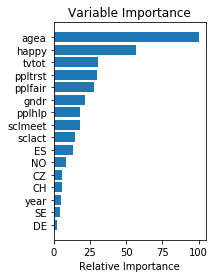

In [7]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [8]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 600,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04732678668848882
Percent Type II errors: 0.1745771958537916

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18404907975460122


In [12]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 800,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04487179487179487
Percent Type II errors: 0.17144026186579378

Test set accuracy:
Percent Type I errors: 0.0687116564417178
Percent Type II errors: 0.18159509202453988


In [13]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04841789416257501
Percent Type II errors: 0.1778505182760502

Test set accuracy:
Percent Type I errors: 0.0638036809815951
Percent Type II errors: 0.18773006134969325


In [24]:
ar = range(2,3,1)
for r in ar:
    print (r)

2


In [10]:
ranges = {'lossVals': ['exponential', 'deviance'],
    'estVals': range(400,600,50),
    'dpthVals': range(2,10,2)}

In [19]:
results = pd.DataFrame()
for key, value in ranges.items():
    print (key)
    print (value)
    results[key]=0
    
    # add Columns to data frame with titles
results    

lossVals
['exponential', 'deviance']
estVals
range(400, 600, 50)
dpthVals
range(2, 10, 2)


,lossVals,estVals,dpthVals


In [18]:
results

,lossVals,estVals,dpthVals


In [56]:
def checkFunc(**ranges):
    print (ranges['lossVals'])
    for l in ranges['lossVals']:
        for d in ranges['dpthVals']:
            for e in ranges['estVals']:
                print (l+str(d)+str(e))
    

In [57]:
checkFunc(**ranges)

['exponential', 'deviance']
exponential2400
exponential2450
exponential2500
exponential2550
exponential4400
exponential4450
exponential4500
exponential4550
exponential6400
exponential6450
exponential6500
exponential6550
exponential8400
exponential8450
exponential8500
exponential8550
deviance2400
deviance2450
deviance2500
deviance2550
deviance4400
deviance4450
deviance4500
deviance4550
deviance6400
deviance6450
deviance6500
deviance6550
deviance8400
deviance8450
deviance8500
deviance8550


In [33]:
for l in lossVals:
    for d in dpthVals:
        for e in estVals:
            print (l+str(d)+str(e))

exponential2400
exponential2450
exponential2500
exponential2550
exponential4400
exponential4450
exponential4500
exponential4550
exponential6400
exponential6450
exponential6500
exponential6550
exponential8400
exponential8450
exponential8500
exponential8550
deviance2400
deviance2450
deviance2500
deviance2550
deviance4400
deviance4450
deviance4500
deviance4550
deviance6400
deviance6450
deviance6500
deviance6550
deviance8400
deviance8450
deviance8500
deviance8550


# Use Other Method to Choose Features

# Use Method to get Baseline

In [723]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
import time
from sklearn import ensemble
from sklearn import linear_model
from sklearn.model_selection import cross_val_score 
from IPython.display import clear_output

class Tuner():
    
    def __init__(self,X,y,cvFolds=10, **tunerRanges):
        self.X = X
        self.y = y
        self.cvFolds = cvFolds
        self.results = pd.DataFrame(columns=['Name', 'Accuracy', 'Range', 'CrossValScores'])
        self.setTunerSpecific(**tunerRanges)
        self.genResults()
    
    def DisplayResultsGraph(self):
        labels = []
        widthscale = self.results.shape[0]/4
        if widthscale < 8:
            widthscale = 8
        plt.figure(figsize=(widthscale,6))
        plt.plot(self.results['Accuracy'])
        labels.append('Accuracy')
        plt.plot(self.results['Accuracy'] + self.results['Range'])
        labels.append('Accuracy + Range')
        plt.legend(labels)
        plt.xticks(np.arange(self.results.shape[0]), (dataResults['Name']),rotation=90)
        plt.show()
    
    def DisplayResultsSummary(self):
        resultSortAcc = self.results.sort_values('Accuracy', ascending=False)
        resultSortRan = self.results.sort_values('Range', ascending=True)
        
        print("Highest Accuracy")
        display(resultSortAcc.head())
        
        print("\nLowest Range")
        display(resultSortRan.head())
        
    def FullResult(self):
        self.DisplayResultsGraph()
        self.DisplayResultsSummary()
        
    def disBox(self):
        plt.boxplot(self.results)
        ax.set_xticklabels(names)
        plt.setp(ax.get_xticklabels(), rotation=90)
        plt.show()
                    
class GradientBoostTuner(Tuner):
    
    def setTunerSpecific(self,**tunerRanges):
        paramList = itertools.product(
            ranges['loss'], 
            ranges['n_esitmators'], 
            ranges['max_depth'])
        self.__setParamsResultList(paramList)
        
    def __setParamsResultList(self,paramList):
        for i in paramList:
            name = "{0} d:{1} e:{2}".format(i[0][:1],i[1],i[2])
            self.results = self.results.append({'Name':name, 
                            'loss':i[0],
                           'n_estimators':i[1],
                           'max_depth':i[2]}, ignore_index=True)
            
    
    def __getCrossVal(self,loss, depth, estimators):
        params = {'n_estimators': int(estimators),
                 'max_depth': int(depth),
                 'loss': loss}
        gb = ensemble.GradientBoostingClassifier(**params)
        cvs = cross_val_score(gb,self.X,self.y,cv=self.cvFolds)
        return cvs
    
    def genResults(self): 
        totIter = self.results.shape[0]
        c=1
        for index,row in self.results.iterrows():
            params = {'n_estimators': int(row.n_estimators),
                     'max_depth': int(row.max_depth),
                     'loss': row.loss}
            gb = ensemble.GradientBoostingClassifier(**params)
            cvs = cross_val_score(gb,self.X,self.y,cv=self.cvFolds)
            self.results.set_value(index,'CrossValScores', cvs)
            self.results.set_value(index,'Accuracy', np.mean(cvs))
            self.results.set_value(index,'Range', max(cvs)-min(cvs))
            clear_output()
            print ("{:.0%} {}".format((c/totIter), self.results.iloc[index].Name))
            c += 1
        self.results = self.results.sort_values(['Accuracy'], axis=0)
        self.results = self.results.reset_index(drop=True)

In [732]:
ranges = {'loss': ['exponential', 'deviance'],
    'n_esitmators': range(500,800,50),
    'max_depth': range(1,10,1)}

#ranges = {'loss': ['exponential', 'deviance'],
#    'n_esitmators': range(600,800,100),
#    'max_depth': range(2,10,4)}

In [ ]:
gradBoostTuner5 = GradientBoostTuner(X,y,cvFolds=3,**ranges)

66% d d:550 e:8


In [ ]:
gradBoostTuner5.FullResult()

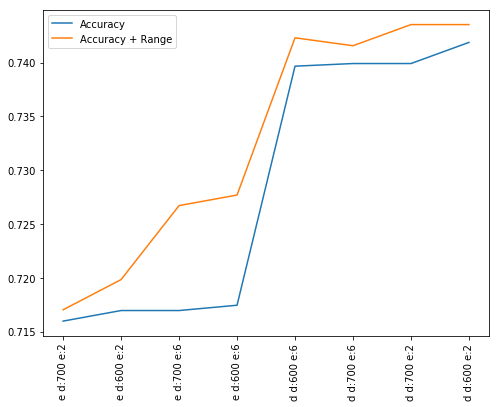

Highest Accuracy


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
7,d d:600 e:2,0.741868,0.00165506,"[0.741040746195, 0.74269580162]",deviance,2.0,600.0
6,e d:700 e:2,0.739904,0.00361849,"[0.738095238095, 0.741713724527]",exponential,2.0,700.0
5,d d:700 e:2,0.739904,0.00165457,"[0.739077074129, 0.740731647434]",deviance,2.0,700.0
4,e d:600 e:2,0.739659,0.00263647,"[0.738340697104, 0.740977166708]",exponential,2.0,600.0
3,e d:600 e:6,0.717443,0.0102412,"[0.712322042219, 0.722563221213]",exponential,6.0,600.0



Lowest Range


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
0,e d:700 e:6,0.715969,0.00105168,"[0.716494845361, 0.715443162288]",exponential,6.0,700.0
5,d d:700 e:2,0.739904,0.00165457,"[0.739077074129, 0.740731647434]",deviance,2.0,700.0
7,d d:600 e:2,0.741868,0.00165506,"[0.741040746195, 0.74269580162]",deviance,2.0,600.0
4,e d:600 e:2,0.739659,0.00263647,"[0.738340697104, 0.740977166708]",exponential,2.0,600.0
1,d d:600 e:6,0.716951,0.00287638,"[0.715513009327, 0.718389393567]",deviance,6.0,600.0


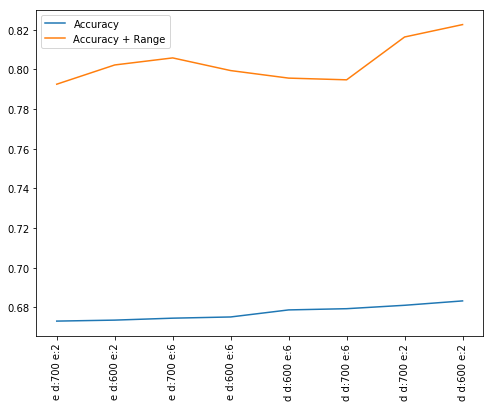

Highest Accuracy


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
7,d d:600 e:2,0.683205,0.139452,"[0.611929307806, 0.686303387334, 0.75138121547]",deviance,2.0,600.0
6,d d:700 e:2,0.680995,0.135401,"[0.613402061856, 0.680780559647, 0.748802946593]",deviance,2.0,700.0
5,d d:700 e:6,0.679274,0.115509,"[0.60824742268, 0.705817378498, 0.723756906077]",deviance,6.0,700.0
4,d d:600 e:6,0.67866,0.116982,"[0.60677466863, 0.705449189985, 0.723756906077]",deviance,6.0,600.0
3,e d:700 e:6,0.675101,0.124347,"[0.60088365243, 0.699189985272, 0.725230202578]",exponential,6.0,700.0



Lowest Range


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
5,d d:700 e:6,0.679274,0.115509,"[0.60824742268, 0.705817378498, 0.723756906077]",deviance,6.0,700.0
4,d d:600 e:6,0.67866,0.116982,"[0.60677466863, 0.705449189985, 0.723756906077]",deviance,6.0,600.0
0,e d:600 e:6,0.673014,0.119558,"[0.59941089838, 0.700662739323, 0.718968692449]",exponential,6.0,600.0
3,e d:700 e:6,0.675101,0.124347,"[0.60088365243, 0.699189985272, 0.725230202578]",exponential,6.0,700.0
1,e d:700 e:2,0.673508,0.128772,"[0.616715758468, 0.658321060383, 0.745488029466]",exponential,2.0,700.0


In [728]:
gradBoostTuner3.FullResult()

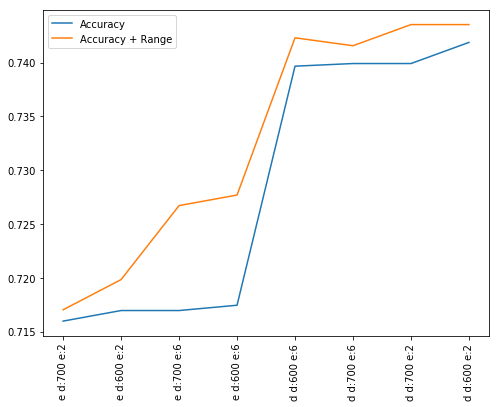

Highest Accuracy


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
7,d d:600 e:2,0.741868,0.00165506,"[0.741040746195, 0.74269580162]",deviance,2.0,600.0
6,e d:700 e:2,0.739904,0.00361849,"[0.738095238095, 0.741713724527]",exponential,2.0,700.0
5,d d:700 e:2,0.739904,0.00165457,"[0.739077074129, 0.740731647434]",deviance,2.0,700.0
4,e d:600 e:2,0.739659,0.00263647,"[0.738340697104, 0.740977166708]",exponential,2.0,600.0
3,e d:600 e:6,0.717443,0.0102412,"[0.712322042219, 0.722563221213]",exponential,6.0,600.0



Lowest Range


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
0,e d:700 e:6,0.715969,0.00105168,"[0.716494845361, 0.715443162288]",exponential,6.0,700.0
5,d d:700 e:2,0.739904,0.00165457,"[0.739077074129, 0.740731647434]",deviance,2.0,700.0
7,d d:600 e:2,0.741868,0.00165506,"[0.741040746195, 0.74269580162]",deviance,2.0,600.0
4,e d:600 e:2,0.739659,0.00263647,"[0.738340697104, 0.740977166708]",exponential,2.0,600.0
1,d d:600 e:6,0.716951,0.00287638,"[0.715513009327, 0.718389393567]",deviance,6.0,600.0


In [726]:
gradBoostTuner.FullResult()

In [704]:
dataResults = pd.DataFrame()
dataResults = gradBoostTuner.results

In [706]:
dataResults = dataResults.sort_values(['Accuracy'], axis=0)

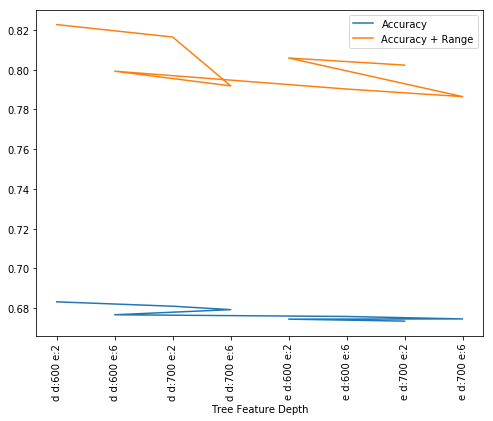

In [707]:
labels = []
widthscale = dataResults.shape[0]/4
if widthscale < 8:
    widthscale = 8
plt.figure(figsize=(widthscale,6))
plt.plot(dataResults['Name'], dataResults['Accuracy'])
labels.append('Accuracy')
plt.plot(dataResults['Name'], dataResults['Accuracy'] + dataResults['Range'])
labels.append('Accuracy + Range')
plt.xlabel('Tree Feature Depth')
plt.legend(labels)
plt.xticks(rotation=90)
plt.show()

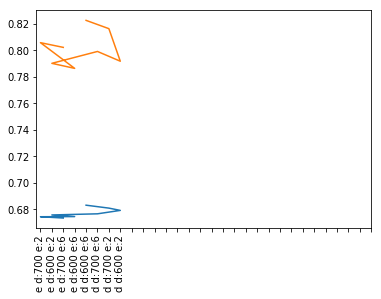

In [708]:
plt.plot(dataResults['Accuracy'])
plt.plot(dataResults['Accuracy'] + dataResults['Range'])
plt.xticks(np.arange(30), (dataResults['Name']),rotation=90)
plt.show()

In [710]:
dataResults

,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
2,e d:700 e:2,0.673508,0.128772,"[0.616715758468, 0.658321060383, 0.745488029466]",exponential,2.0,700.0
0,e d:600 e:2,0.67449,0.13135,"[0.616347569956, 0.65942562592, 0.747697974217]",exponential,2.0,600.0
3,e d:700 e:6,0.67461,0.111826,"[0.606406480118, 0.699189985272, 0.718232044199]",exponential,6.0,700.0
1,e d:600 e:6,0.675837,0.114403,"[0.604565537555, 0.703976435935, 0.718968692449]",exponential,6.0,600.0
5,d d:600 e:6,0.676697,0.122505,"[0.601251840943, 0.705081001473, 0.723756906077]",deviance,6.0,600.0
7,d d:700 e:6,0.679274,0.112563,"[0.608983799705, 0.707290132548, 0.721546961326]",deviance,6.0,700.0
6,d d:700 e:2,0.680995,0.135401,"[0.613402061856, 0.680780559647, 0.748802946593]",deviance,2.0,700.0
4,d d:600 e:2,0.683205,0.139452,"[0.611929307806, 0.686303387334, 0.75138121547]",deviance,2.0,600.0


In [715]:
dataResults = dataResults.reset_index(drop=True)

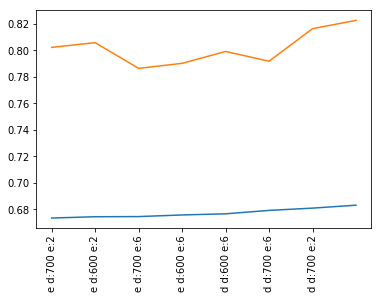

In [716]:
plt.plot(dataResults['Accuracy'])
plt.plot(dataResults['Accuracy'] + dataResults['Range'])
plt.xticks(np.arange(7), (dataResults['Name']),rotation=90)
plt.show()